# Project Aljabar Linier Lanjut - Kelompok 5 Kamis
Kelas 02 - Kamis

# **Importing the required packages**

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (10,5) 
plt.rcParams['font.size'] = 12 

# **Dataset Information**

Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**


*   4WD/4X4 = Four-wheel drive
*   AWD = All-wheel drive
*   FFV = Flexible-fuel vehicle
*   SWB = Short wheelbase
*   LWB = Long wheelbase
*   EWB = Extended wheelbase

**Transmission:**

*   A = automatic
*   AM = automated manual
*   AS = automatic with select shift
*   AV = continuously variable
*   M = manual
*   3 – 10 = Number of gears

**Fuel type:**

*   X = regular gasoline
*   Z = premium gasoline
*   D = diesel
*   E = ethanol (E85)
*   N = natural gas

**Fuel consumption**: City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions**: the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating**: the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating**: the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

# **Load the Fuel Consumption dataset**

In [148]:
url = 'https://raw.githubusercontent.com/grandier/2022-Fuel-Consumption-Ratings/master/MY2022%20Fuel%20Consumption%20Ratings.csv'
df = pd.read_csv(url)
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


# **Data Exploration**

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [150]:
df.isnull().sum().to_frame()

,0
Model Year,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption (City (L/100 km),0
Fuel Consumption(Hwy (L/100 km)),0


In [151]:
df.nunique().sort_values(ascending = False).to_frame()

,0
Model,715
CO2 Emissions(g/km),242
Fuel Consumption (City (L/100 km),149
Fuel Consumption(Comb (L/100 km)),131
Fuel Consumption(Hwy (L/100 km)),107
Fuel Consumption(Comb (mpg)),49
Make,39
Engine Size(L),36
Transmission,23
Vehicle Class,14


In [152]:
df['Model Year'].value_counts().to_frame()

,Model Year
2022,946


In [153]:
df['Engine Size(L)'].value_counts().to_frame()

,Engine Size(L)
2.0,210
3.0,134
2.5,72
3.5,50
5.3,49
3.6,47
4.0,40
6.2,33
1.5,32
5.0,32


In [154]:
df['Cylinders'].value_counts().to_frame()

,Cylinders
4,404
6,295
8,197
3,21
12,17
10,8
16,3
5,1


In [155]:
df['CO2 Rating'].value_counts().to_frame()

,CO2 Rating
5,266
4,228
3,189
6,113
7,71
2,48
9,13
8,10
1,7
10,1


In [156]:
df['Smog Rating'].value_counts().to_frame()

,Smog Rating
5,308
3,198
7,194
6,189
1,57


c:\Users\rafly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


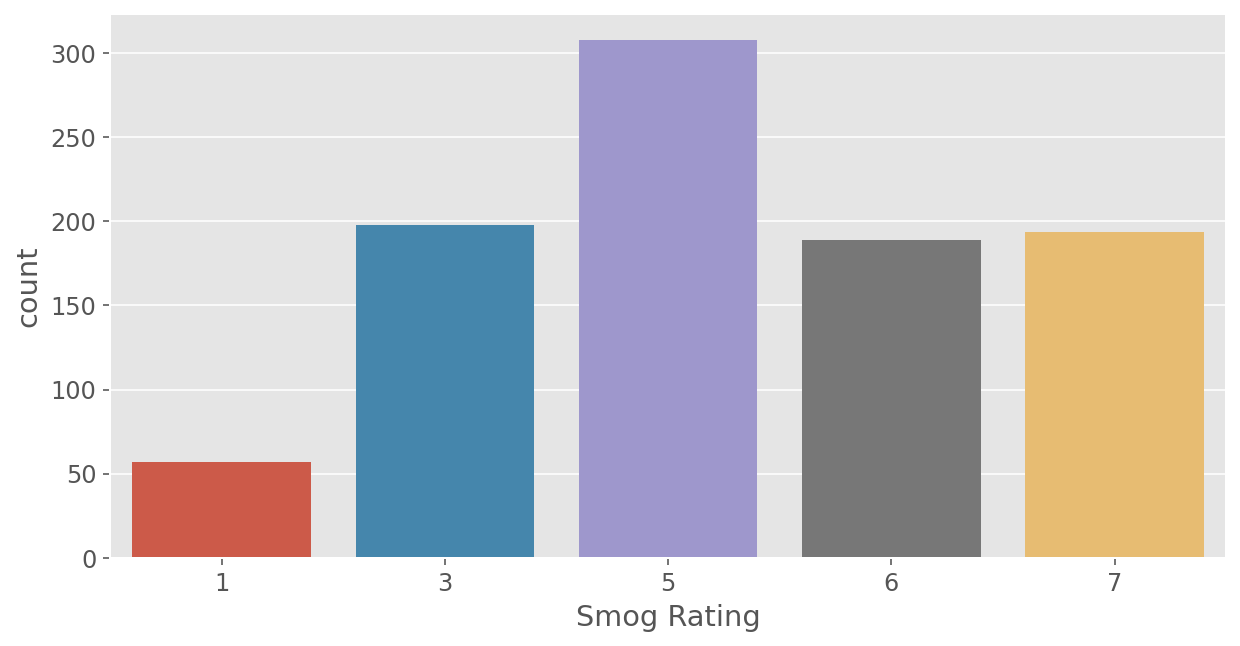

In [157]:
sns.countplot(df['Smog Rating']);

c:\Users\rafly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


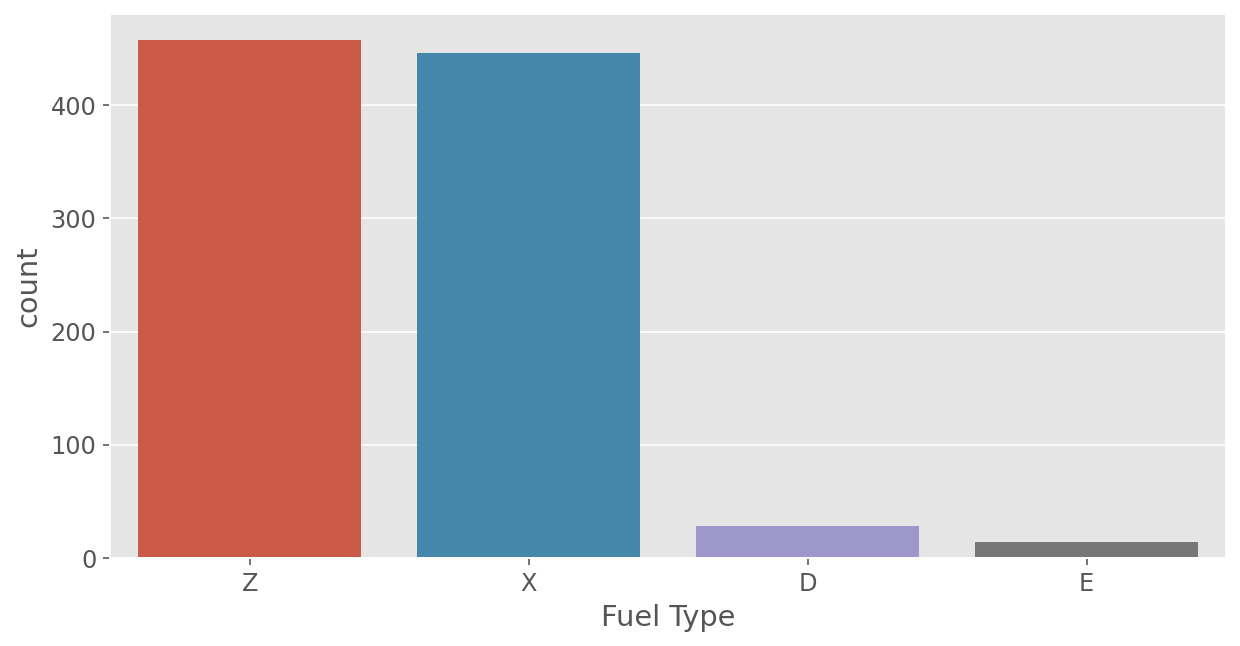

In [158]:
sns.countplot(df['Fuel Type']);

# **Descriptive Statistical Analysis**

In [159]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [160]:
df_fueltype = df.groupby(['Fuel Type'],as_index=False).mean()
df_fueltype

,Fuel Type,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,D,2022.0,2.964286,5.642857,11.282143,8.664286,10.117857,28.107143,271.571429,4.142857,2.500000
1,E,2022.0,4.457143,7.142857,19.864286,14.992857,17.692857,16.285714,294.857143,3.642857,4.285714
2,X,2022.0,2.877578,5.040359,11.225336,8.780269,10.124888,30.038117,237.580717,5.042601,5.730942
3,Z,2022.0,3.487336,6.235808,13.603930,9.801747,11.891703,24.812227,278.349345,4.100437,4.360262


Fuel type: X = regular gasoline; Z = premium gasoline; D = diesel; E = E85;

Gas E85 yang terdiri dari antara 51% dan 83% etanol yang dicampur dengan bensin tampaknya memiliki emisi CO2 tertinggi dan kemudian CO2 rating terendah. Konsumsi bahan bakarnya juga sangat tinggi baik di kota maupun di jalan raya. Bensin biasa sepertinya irit bahan bakar baik dari segi konsumsi maupun emisi.

In [161]:
df.corr()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [162]:
df.drop(['Model Year'], axis = 1).corr()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [163]:
df.drop(['Model Year'], axis = 1).corr().unstack().sort_values(ascending = False).drop_duplicates().to_frame()

0
Engine Size(L)                    Engine Size(L)                     1.000000
Fuel Consumption (City (L/100 km) Fuel Consumption(Comb (L/100 km))  0.990321
Fuel Consumption(Comb (L/100 km)) CO2 Emissions(g/km)                0.971671
                                  Fuel Consumption(Hwy (L/100 km))   0.967138
CO2 Emissions(g/km)               Fuel Consumption (City (L/100 km)  0.965632
CO2 Rating                        Fuel Consumption(Comb (mpg))       0.949561
Fuel Consumption(Hwy (L/100 km))  CO2 Emissions(g/km)                0.933991
                                  Fuel Consumption (City (L/100 km)  0.922850
Cylinders                         Engine Size(L)                     0.920698
                                  Fuel Consumption (City (L/100 km)  0.845688
Fuel Consumption (City (L/100 km) Engine Size(L)                     0.834925
Cylinders                         CO2 Emissions(g/km)                0.833241
CO2 Emissions(g/km)               Engine Size(L)                     0.824188
Fuel Consumption(Comb (L/100 km)) Cylinders                          0.821718
Engine Size(L)                    Fuel Consumption(Comb (L/100 km))  0.818694
Fuel Consumption(Hwy (L/100 km))  Engine Size(L)                     0.749374
Cylinders                         Fuel Consumption(Hwy (L/100 km))   0.737652
CO2 Rating                        Smog Rating                        0.502625
Smog Rating                       Fuel Consumption(Comb (mpg))       0.473990
Fuel Consumption(Hwy (L/100 km))  Smog Rating                       -0.402099
Smog Rating                       Engine Size(L)                    -0.448239
Fuel Consumption(Comb (L/100 km)) Smog Rating                       -0.490473
Smog Rating                       Cylinders                         -0.502149
CO2 Emissions(g/km)               Smog Rating                       -0.520437
Smog Rating                       Fuel Consumption (City (L/100 km) -0.523928
Fuel Consumption(Comb (mpg))      Cylinders                         -0.693594
Engine Size(L)                    Fuel Consumption(Comb (mpg))      -0.704163
CO2 Rating                        Cylinders                         -0.762157
Engine Size(L)                    CO2 Rating                        -0.766333
Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (mpg))      -0.877531
CO2 Rating                        Fuel Consumption(Hwy (L/100 km))  -0.894668
Fuel Consumption(Comb (mpg))      Fuel Consumption (City (L/100 km) -0.909477
CO2 Emissions(g/km)               Fuel Consumption(Comb (mpg))      -0.913019
Fuel Consumption(Comb (mpg))      Fuel Consumption(Comb (L/100 km)) -0.914305
Fuel Consumption (City (L/100 km) CO2 Rating                        -0.920524
CO2 Rating                        Fuel Consumption(Comb (L/100 km)) -0.927705
                                  CO2 Emissions(g/km)               -0.954593

(0.0, 633.7)

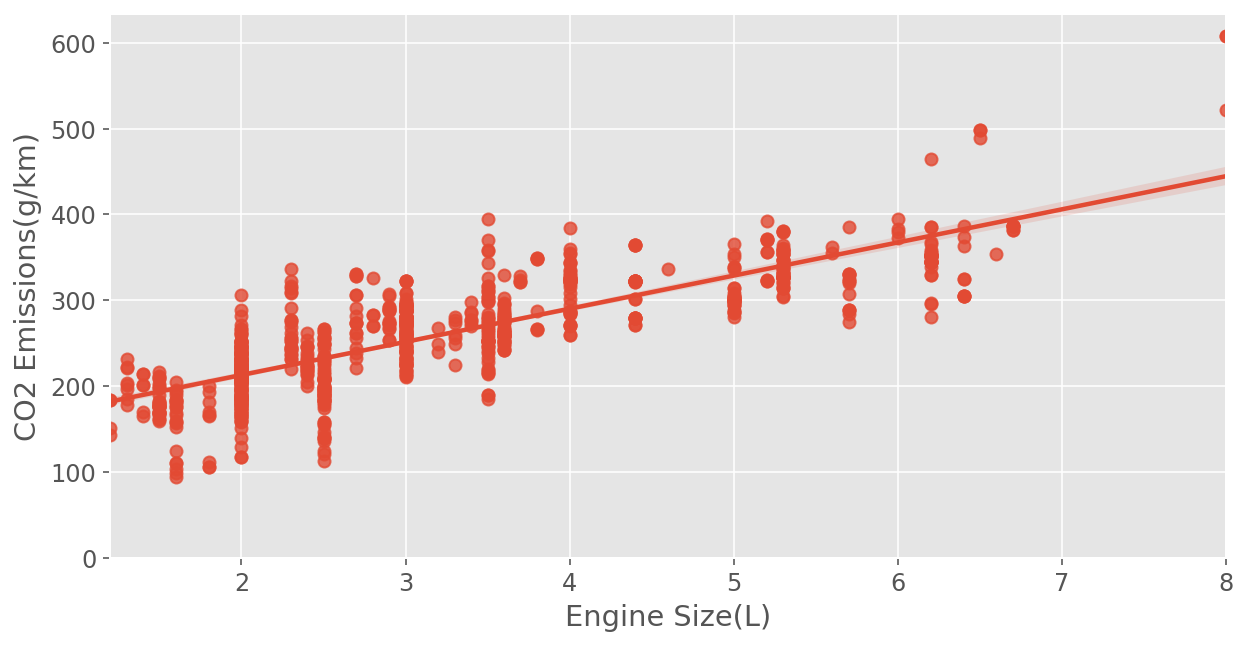

In [164]:
sns.regplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df)
plt.ylim(0,)

(0.0, 633.7)

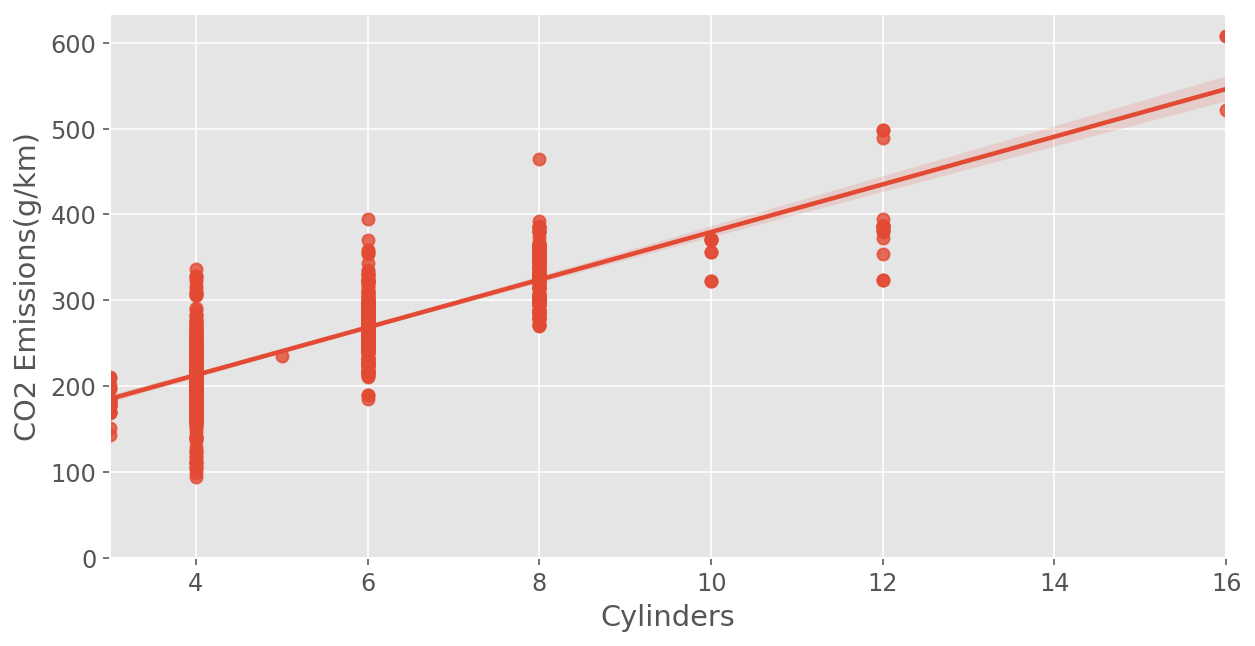

In [165]:
sns.regplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df)
plt.ylim(0,)

(0.0, 27.205000000000002)

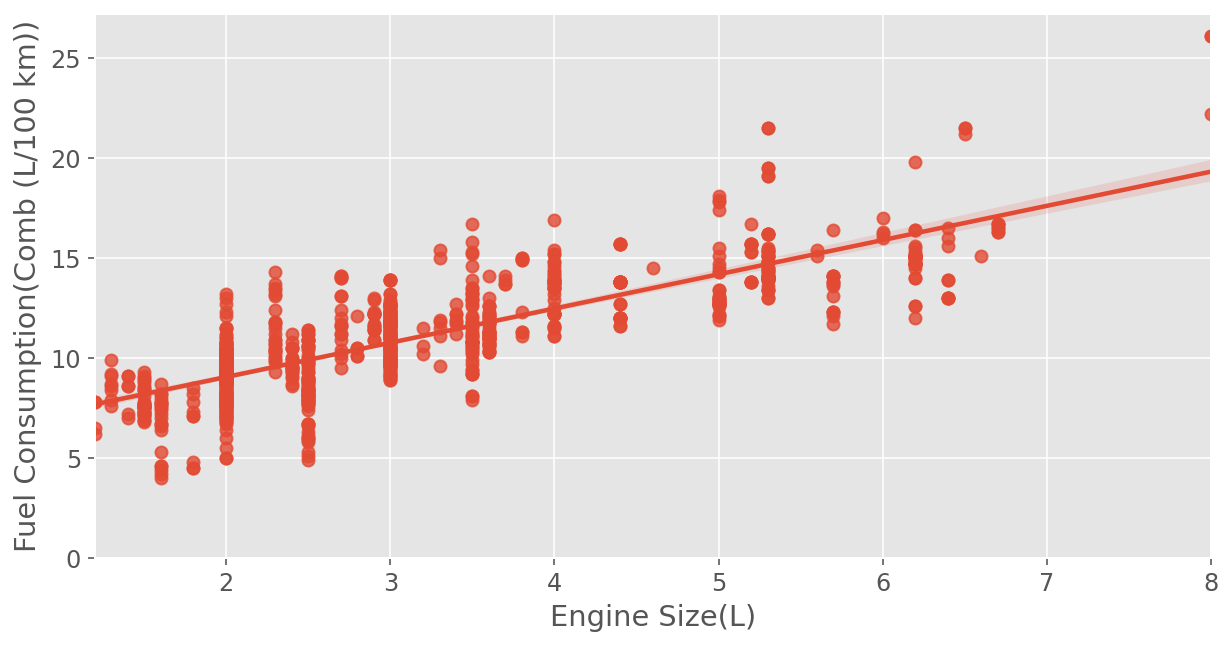

In [166]:
sns.regplot(x="Engine Size(L)", y="Fuel Consumption(Comb (L/100 km))", data=df)
plt.ylim(0,)

(0.0, 27.205000000000002)

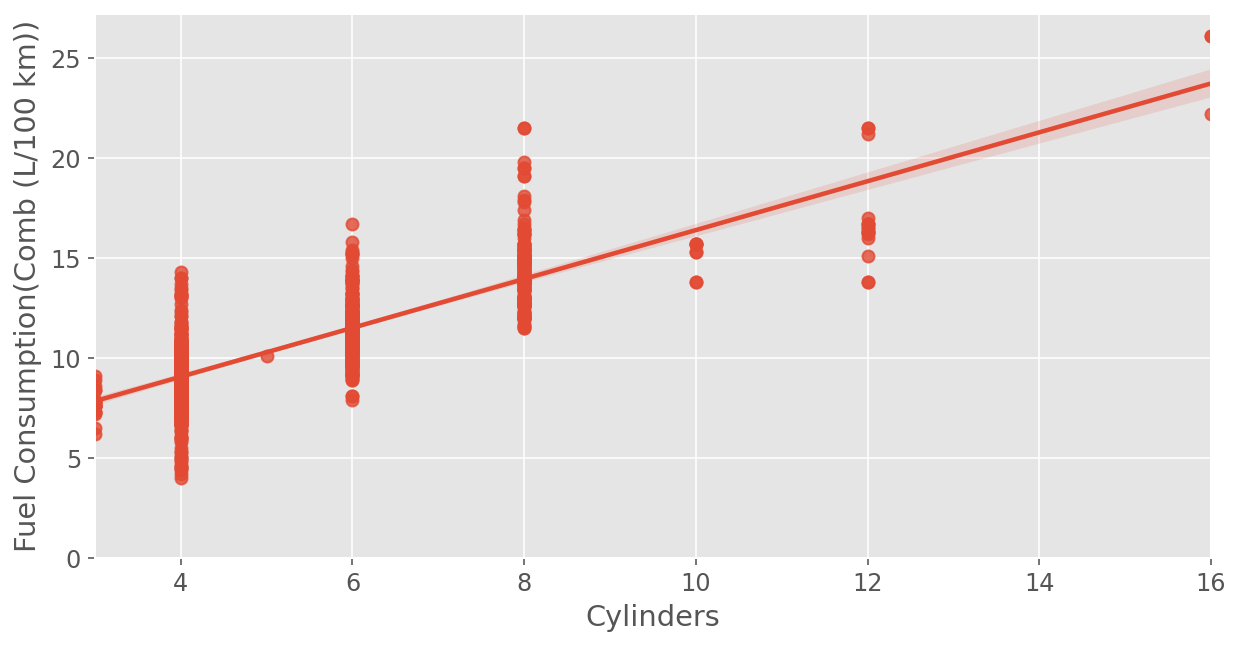

In [167]:
sns.regplot(x="Cylinders", y="Fuel Consumption(Comb (L/100 km))", data=df)
plt.ylim(0,)

# Box Plots
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

Minimun: Smallest number in the dataset.
First quartile: Middle number between the minimum and the median.
Second quartile (Median): Middle number of the (sorted) dataset.
Third quartile: Middle number between median and maximum.
Maximum: Highest number in the dataset.

Vehicle Class Vs CO2 Emissions

<AxesSubplot:xlabel='Vehicle Class', ylabel='CO2 Emissions(g/km)'>

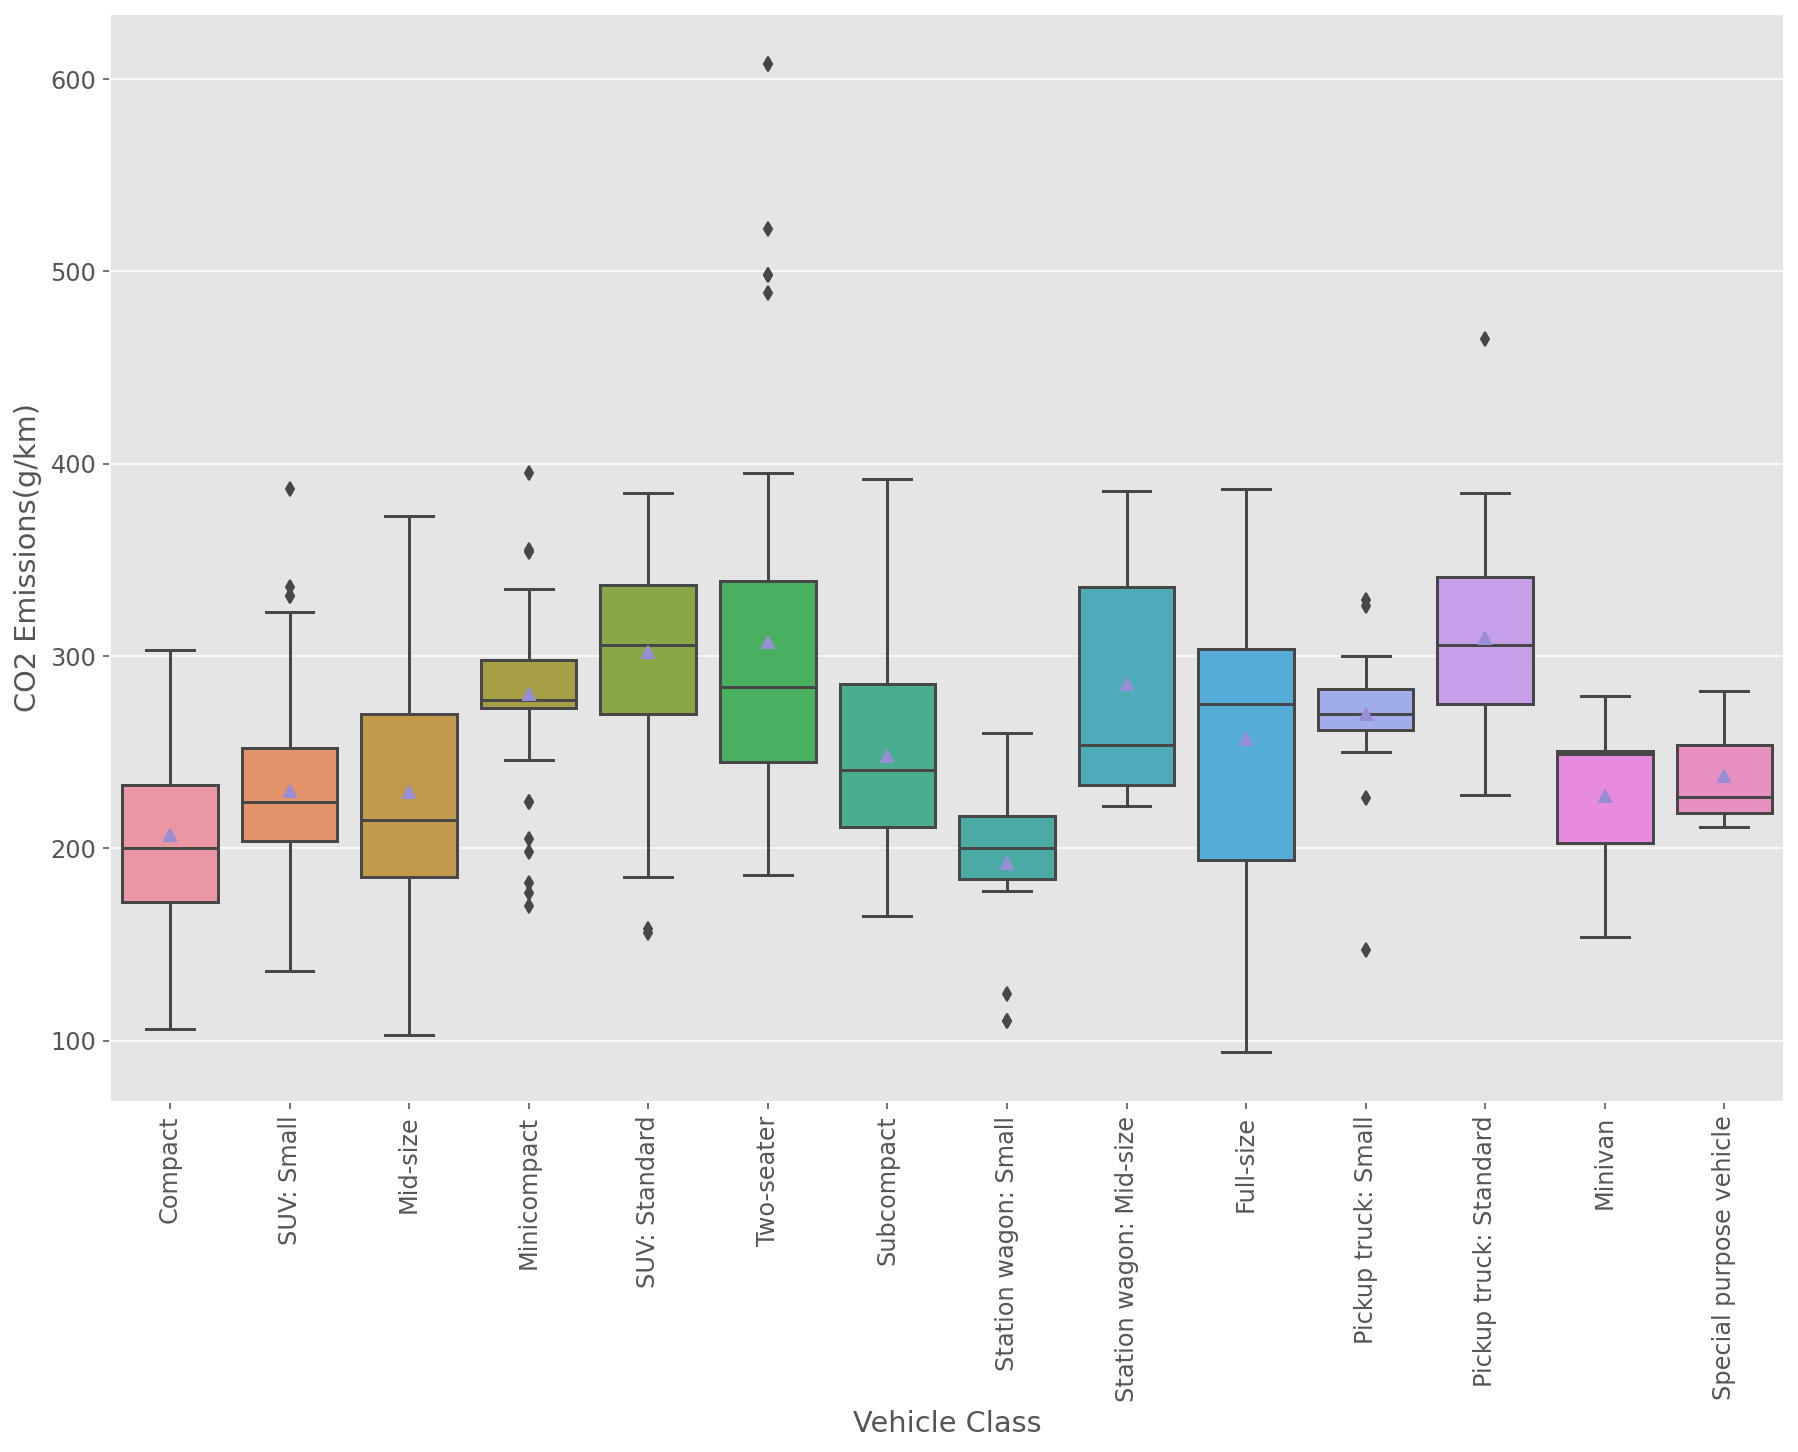

In [168]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True)

<AxesSubplot:xlabel='Vehicle Class', ylabel='CO2 Emissions(g/km)'>

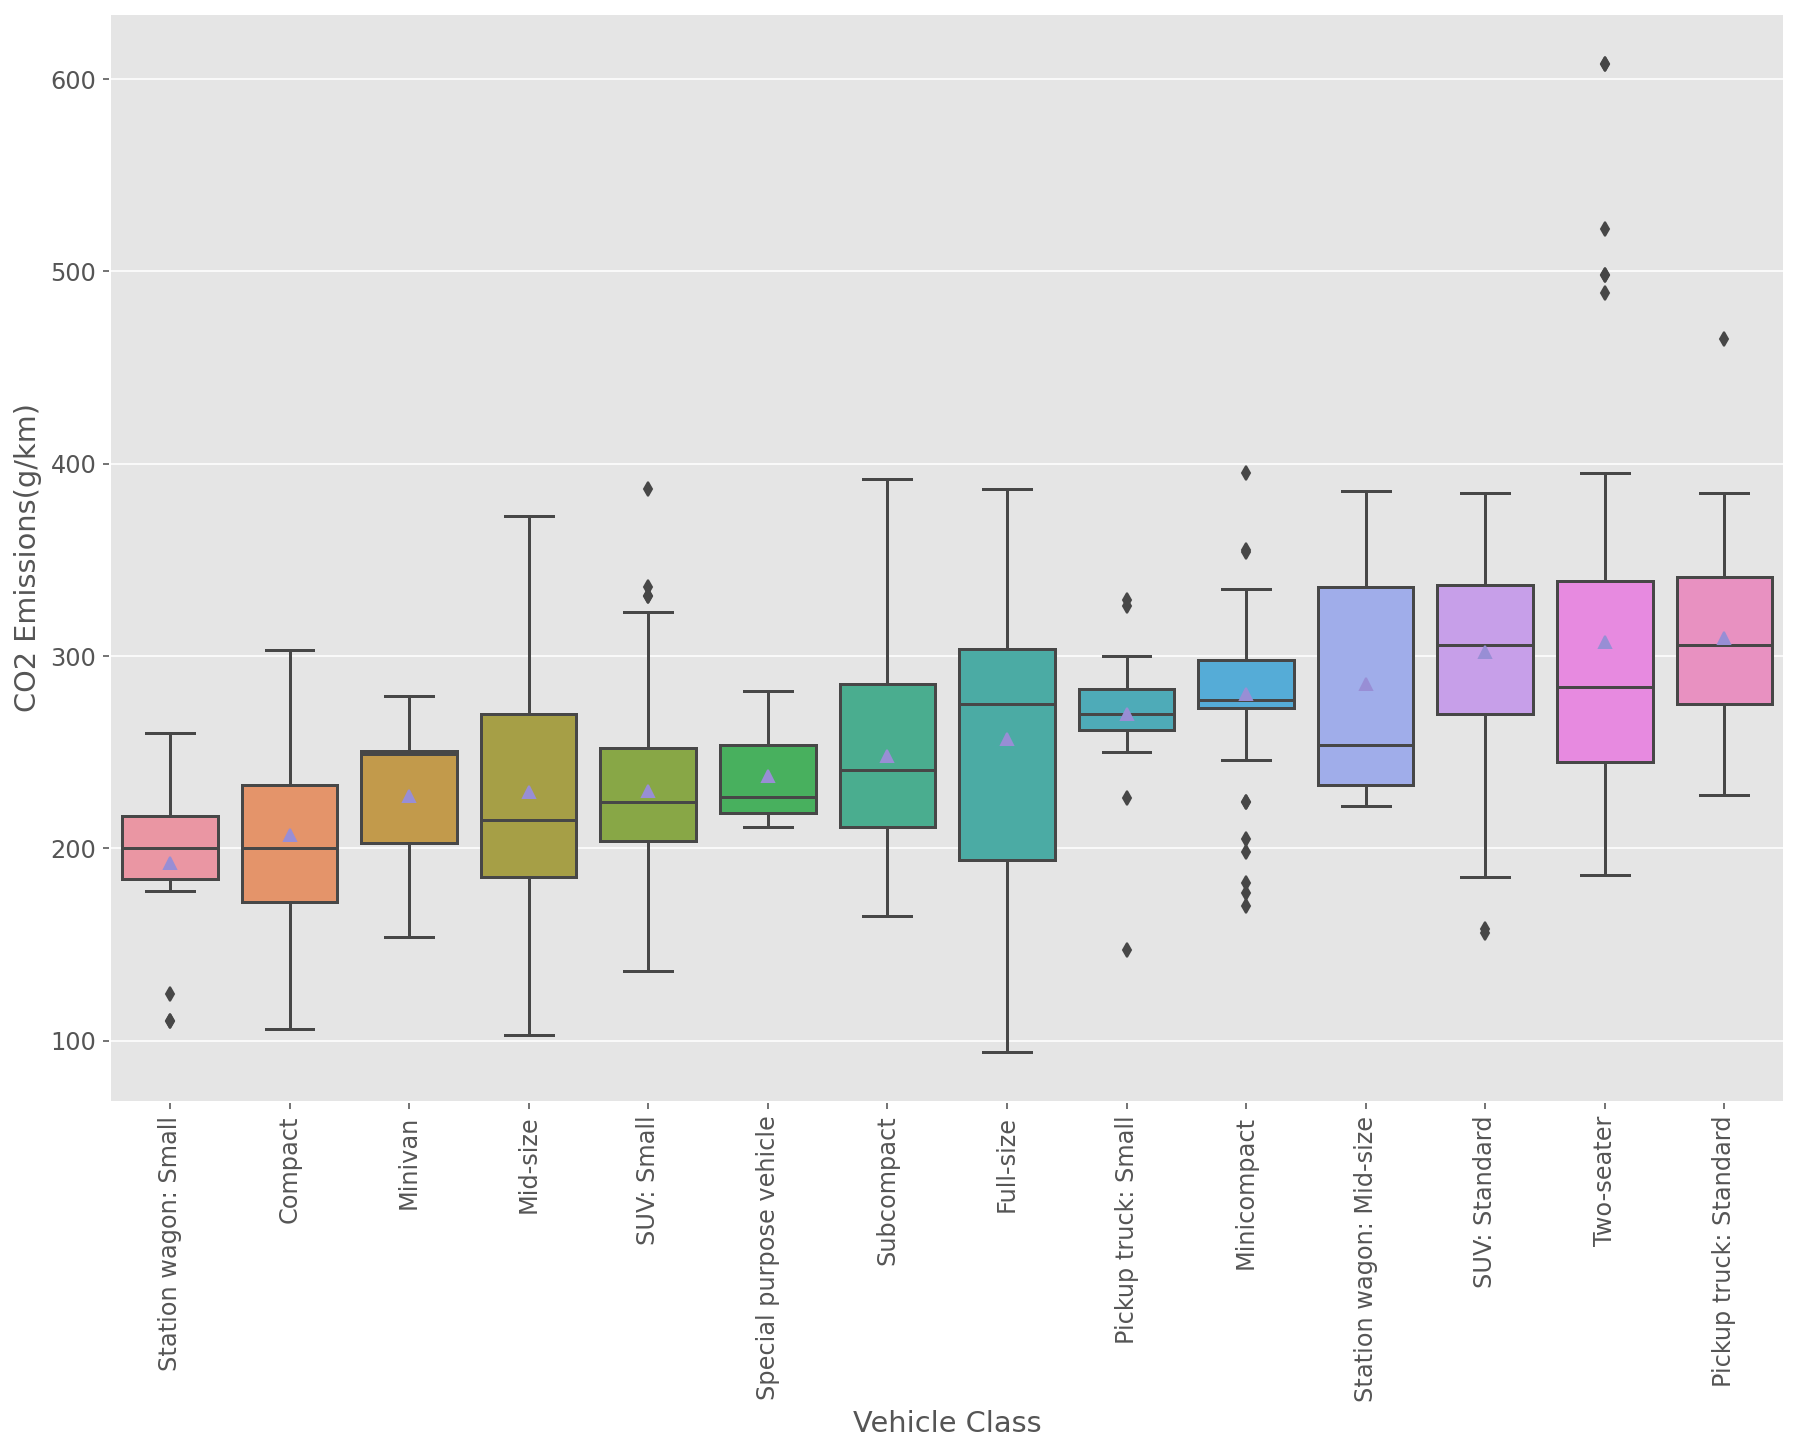

In [169]:
sorted = df[['Vehicle Class', 'CO2 Emissions(g/km)']].groupby("Vehicle Class").mean()
sorted = sorted.sort_values('CO2 Emissions(g/km)')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True, order=sorted_index)

Vehicle Class Vs Combined City & Highway Fuel Consumption

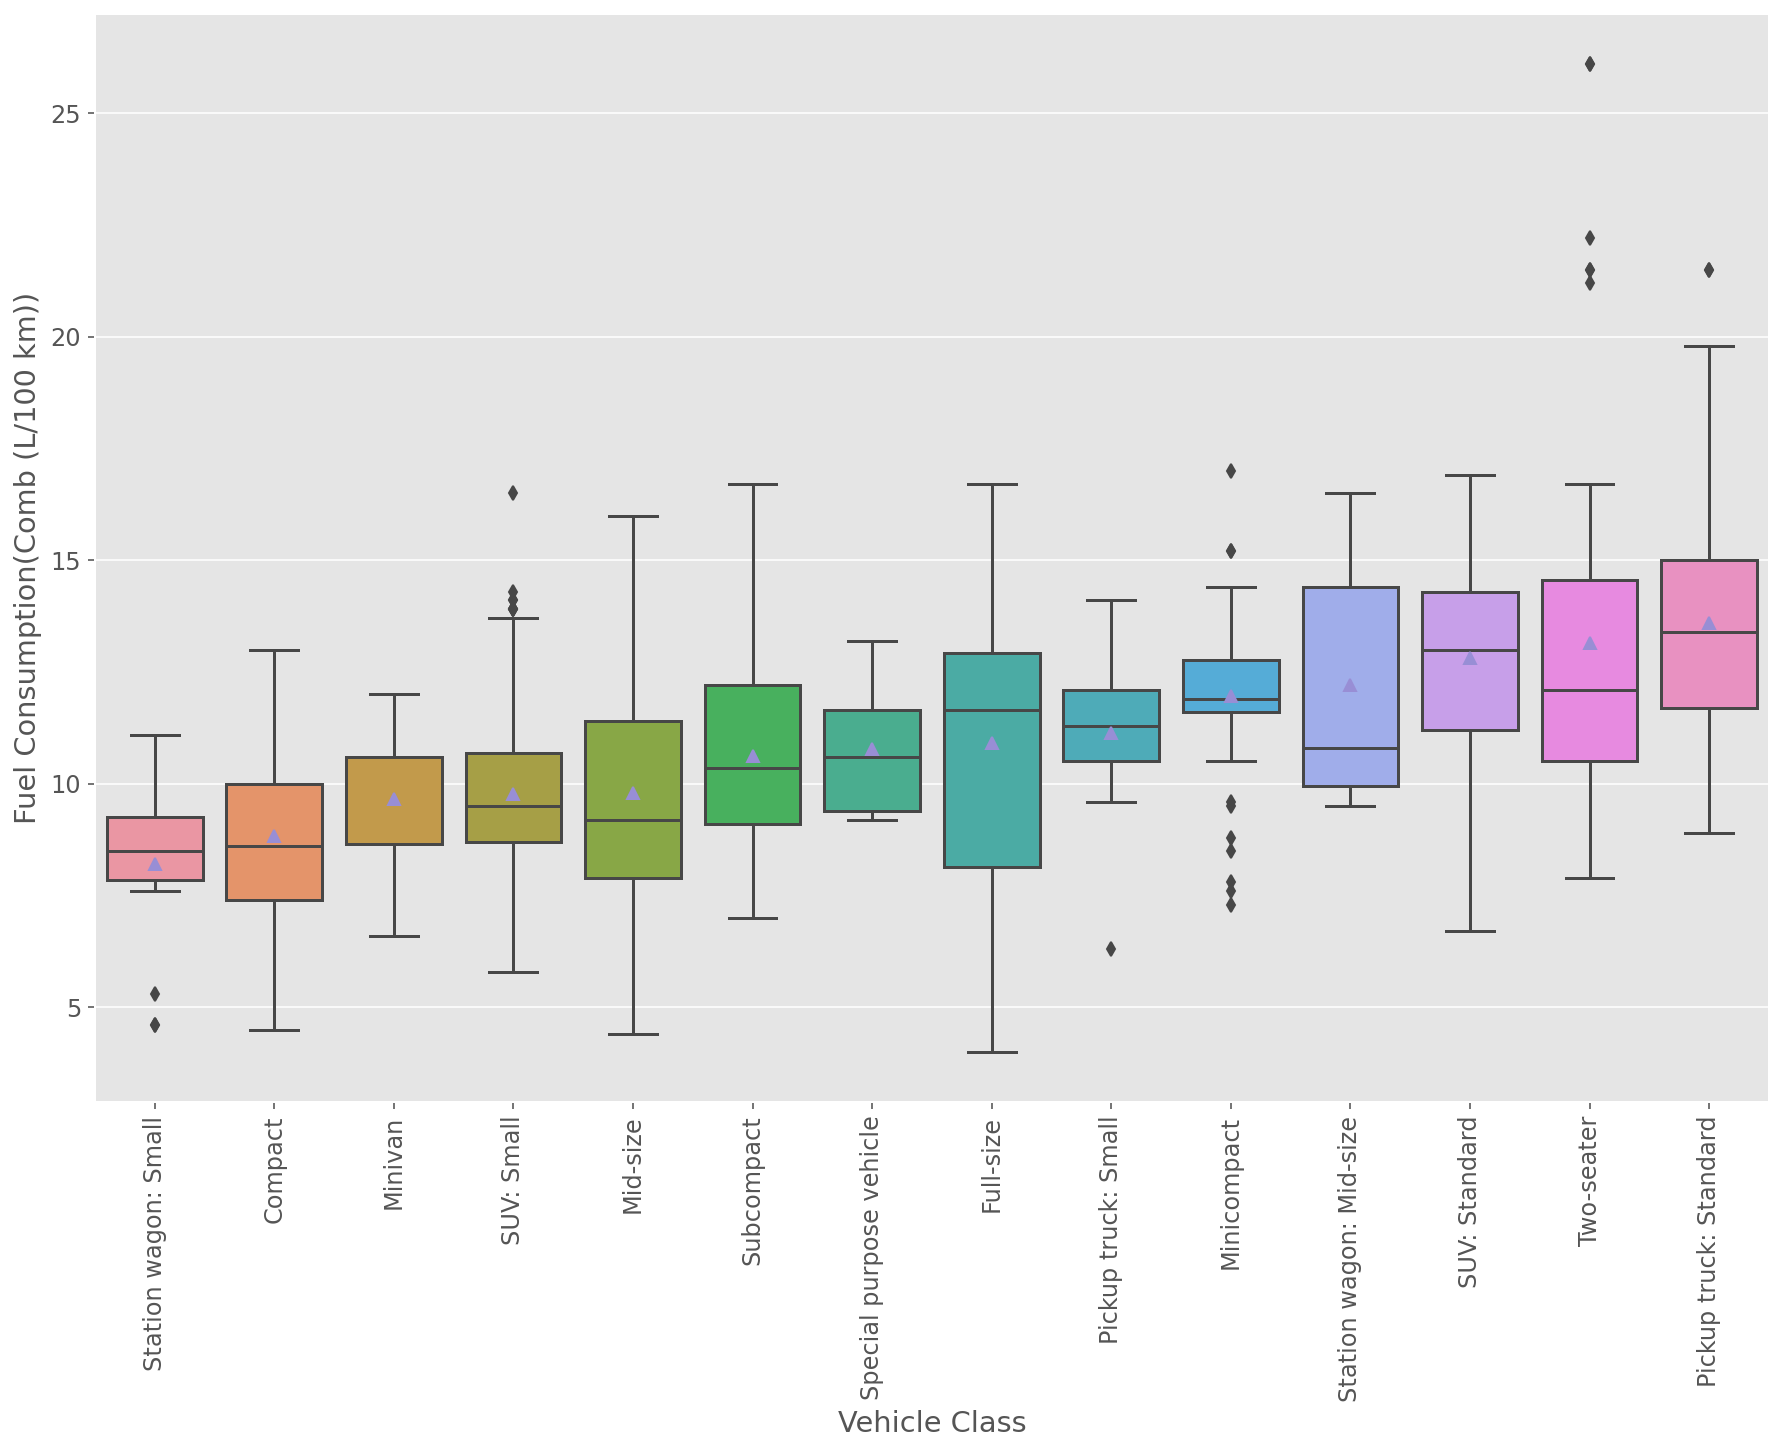

In [170]:
sorted = df[['Vehicle Class', 'Fuel Consumption(Comb (L/100 km))']].groupby("Vehicle Class").mean()
sorted = sorted.sort_values('Fuel Consumption(Comb (L/100 km))')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, order=sorted_index);

### *Handling Outlier*

<AxesSubplot:>

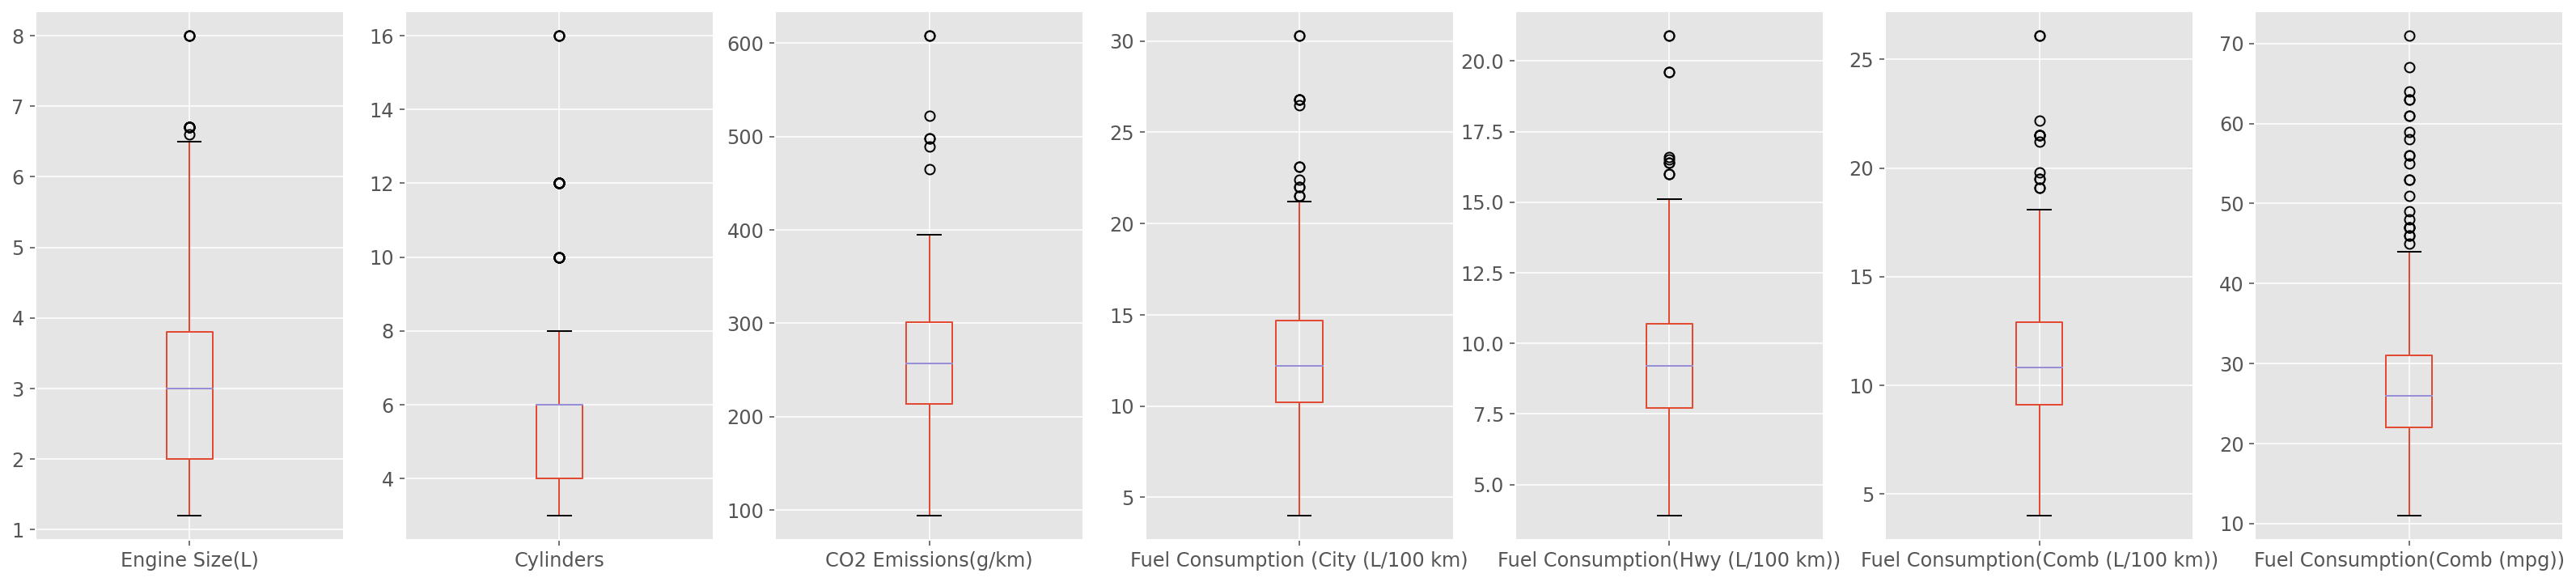

In [171]:
fig, axs = plt.subplots(ncols=7)
fig.set_size_inches(28, 6)
df['Engine Size(L)'].plot(kind='box', ax=axs[0])
df['Cylinders'].plot(kind='box', ax=axs[1])
df['CO2 Emissions(g/km)'].plot(kind='box', ax=axs[2])
df['Fuel Consumption (City (L/100 km)'].plot(kind='box', ax=axs[3])
df['Fuel Consumption(Hwy (L/100 km))'].plot(kind='box', ax=axs[4])
df['Fuel Consumption(Comb (L/100 km))'].plot(kind='box', ax=axs[5])
df['Fuel Consumption(Comb (mpg))'].plot(kind='box', ax=axs[6])

In [172]:
cols = ["Engine Size(L)", "Cylinders", "CO2 Emissions(g/km)", "Fuel Consumption (City (L/100 km)", "Fuel Consumption(Hwy (L/100 km))", "Fuel Consumption(Comb (L/100 km))", "Fuel Consumption(Comb (mpg))"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(drop=True, inplace=True)
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
884,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
885,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
886,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


<AxesSubplot:>

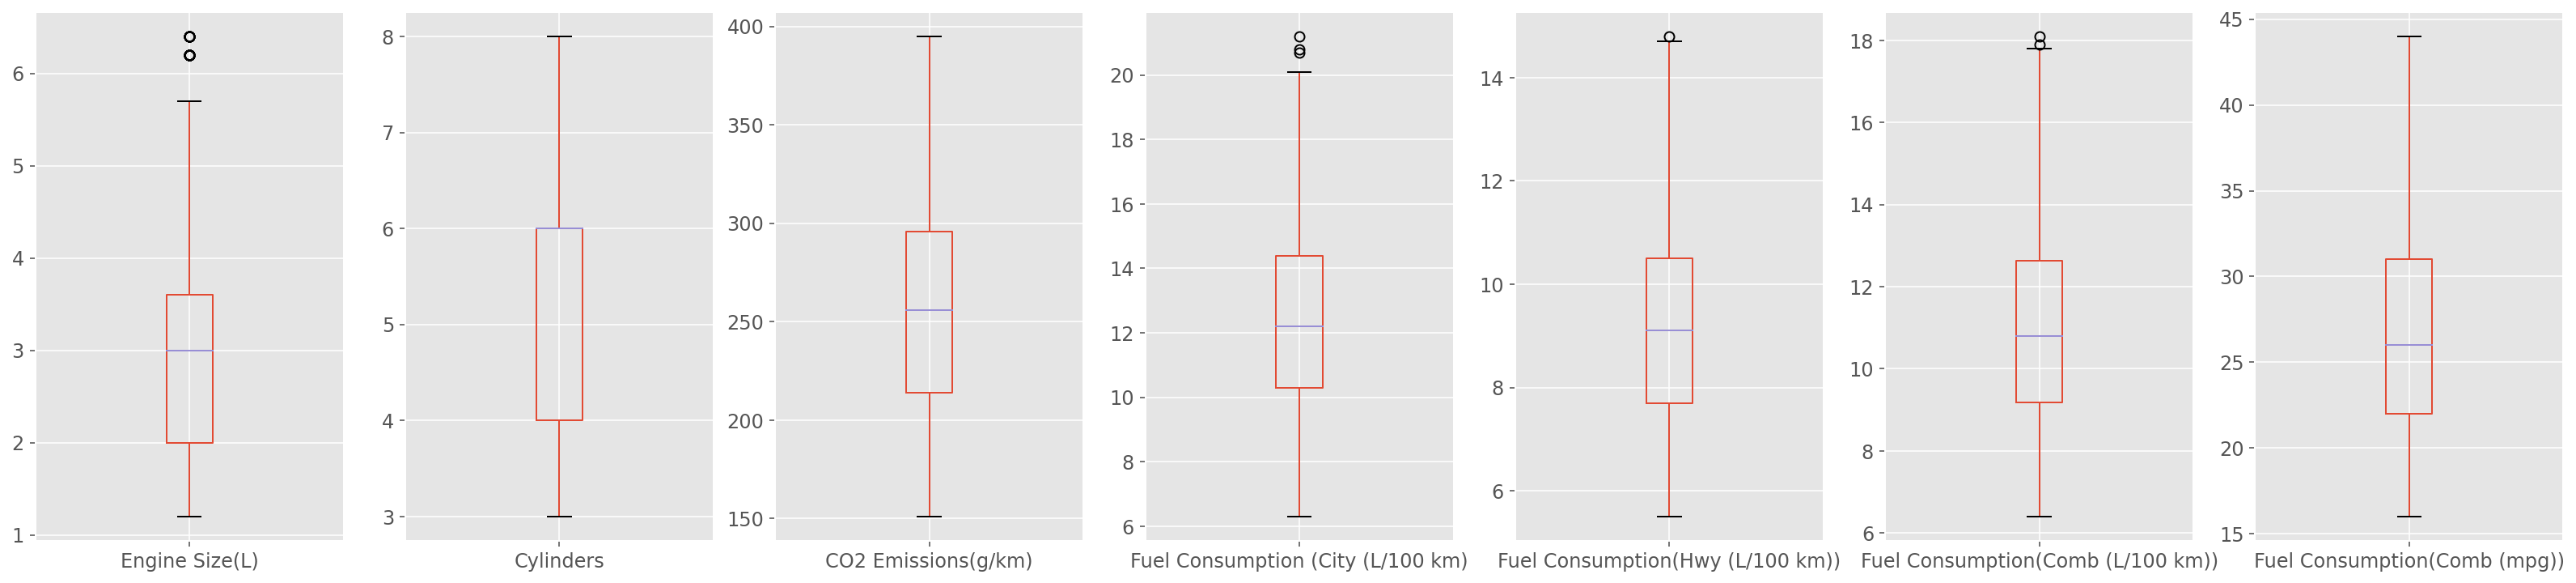

In [173]:
fig, axs = plt.subplots(ncols=7)
fig.set_size_inches(28, 6)
df['Engine Size(L)'].plot(kind='box', ax=axs[0])
df['Cylinders'].plot(kind='box', ax=axs[1])
df['CO2 Emissions(g/km)'].plot(kind='box', ax=axs[2])
df['Fuel Consumption (City (L/100 km)'].plot(kind='box', ax=axs[3])
df['Fuel Consumption(Hwy (L/100 km))'].plot(kind='box', ax=axs[4])
df['Fuel Consumption(Comb (L/100 km))'].plot(kind='box', ax=axs[5])
df['Fuel Consumption(Comb (mpg))'].plot(kind='box', ax=axs[6])

In [174]:
df[['CO2 Rating', 'Smog Rating']].describe()

,CO2 Rating,Smog Rating
count,888.000000,888.000000
mean,4.528153,5.011261
std,1.268514,1.597591
min,2.000000,1.000000
25%,4.000000,5.000000
50%,5.000000,5.000000
75%,5.000000,6.000000
max,8.000000,7.000000


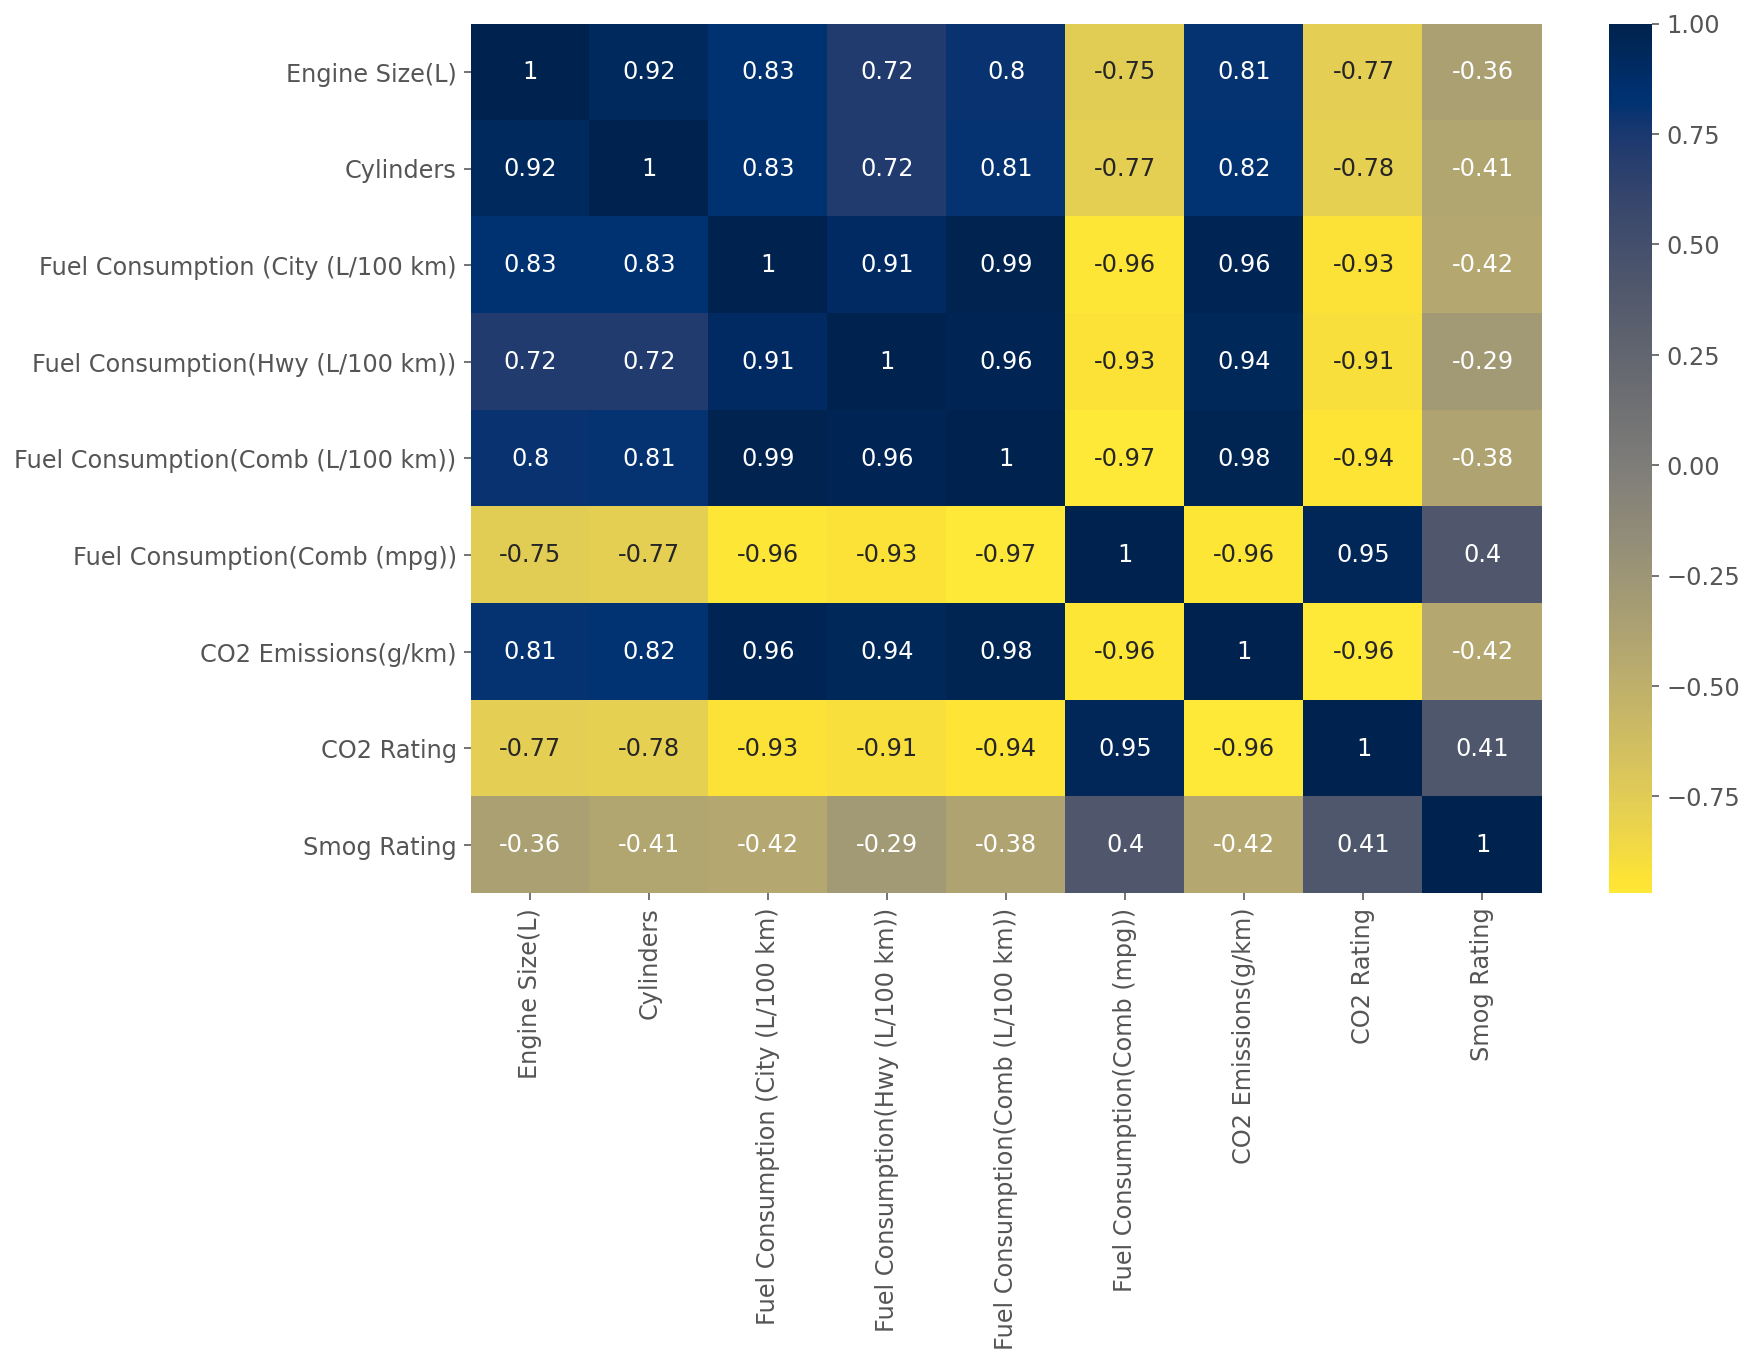

In [175]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Model Year'], axis = 1).corr(), cmap="cividis_r", annot = True);

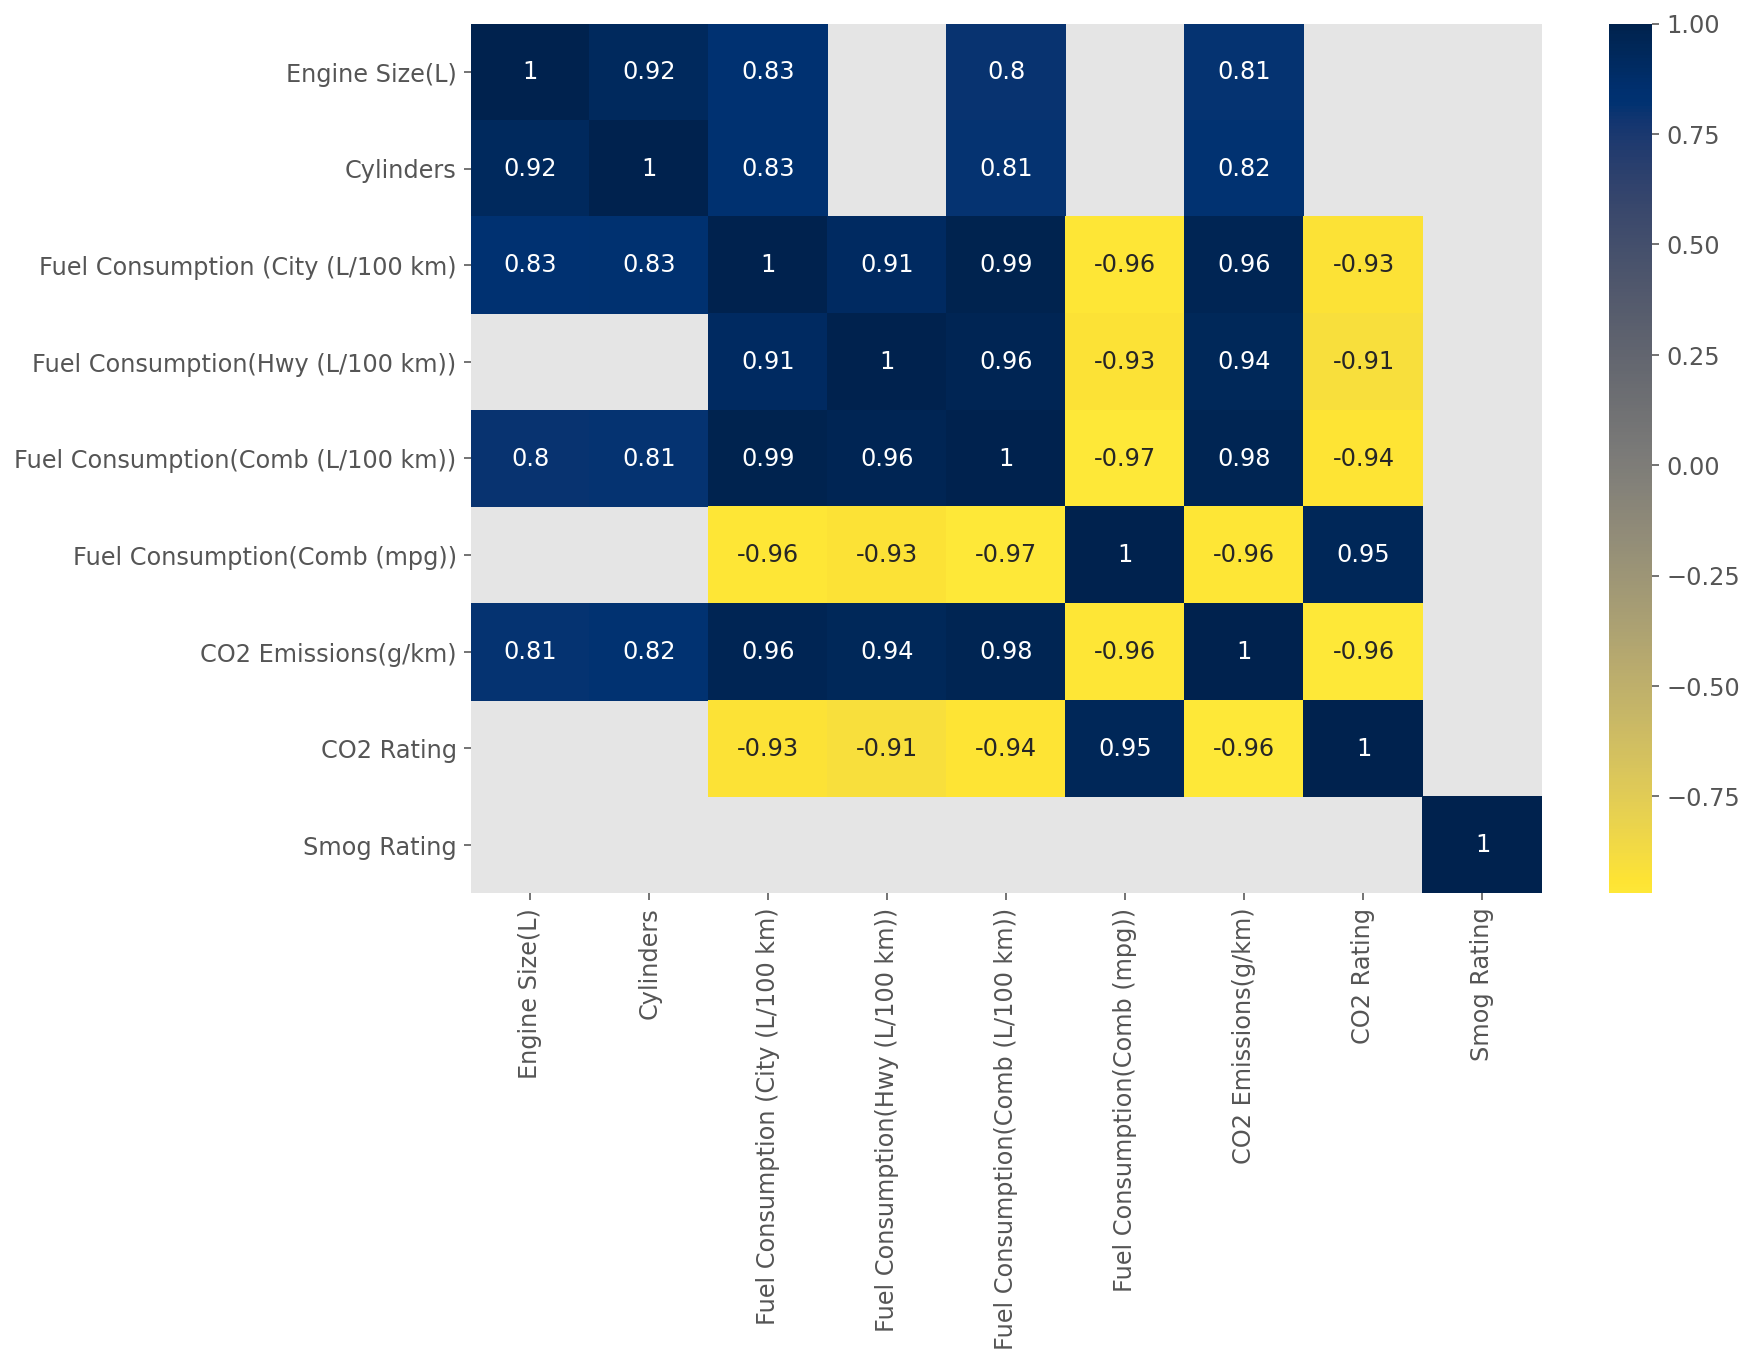

In [176]:
corr = df.drop(['Model Year'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

**P-value:**

Dalam analisis statistik P-value digunakan untuk mengetahui signifikansi estimasi korelasi. P-value adalah nilai probabilitas bahwa korelasi antara kedua variabel tersebut signifikan secara statistik. Biasanya, kita memilih tingkat signifikansi 0,05, yang berarti bahwa kita yakin 95% bahwa korelasi antar variabel signifikan. Dengan konvensi, ketika

- p-value < 0,001: kita katakan ada bukti kuat bahwa korelasinya signifikan.
- p-value < 0,05: terdapat bukti moderat bahwa korelasi tersebut signifikan.
- p-value < 0,1: terdapat bukti lemah bahwa korelasi tersebut signifikan.
- p-value > 0,1: tidak ada bukti bahwa korelasi tersebut signifikan.

Informasi ini diperoleh dengan menggunakan modul "stats" di library "scipy".

In [177]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
print("\n")
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
print("\n")
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)
print("\n")
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is 0.8155516049353769  with a P-value of P = 1.0959336300142211e-212


The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is 0.8083066038261989  with a P-value of P = 4.8613838558328345e-206


The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is 0.8093728884515526  with a P-value of P = 5.326492495454644e-207


The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is 0.8040741873693197  with a P-value of P = 2.753198125326293e-202


**Conclusion:**

Karena nilai p < 0,001, semua korelasi antar Silinder, Ukuran Mesin, Konsumsi Bahan Bakar Gabungan, dan Emisi CO2 signifikan secara statistik, dan hubungan liniernya juga sangat kuat (>0,80)

**ANOVA: Analysis of Variance**
Analisis Varians (ANOVA) adalah metode statistik yang digunakan untuk menguji apakah ada perbedaan yang signifikan antara mean dari dua atau lebih kelompok. ANOVA dapat digunakan untuk menemukan korelasi antara kelompok yang berbeda dari variabel kategori.

**ANOVA returns two parameters:**

F-test score: ANOVA mengasumsikan rata-rata semua kelompok adalah sama, menghitung seberapa jauh rata-rata yang sebenarnya menyimpang dari asumsi, dan melaporkannya sebagai skor F-test. F-test menghitung rasio variasi antara rata-rata kelompok terhadap variasi dalam masing-masing rata-rata kelompok sampel. Skor yang lebih besar berarti ada perbedaan yang lebih besar antara rata-rata.
P-value: P-value menunjukkan seberapa signifikan secara statistik nilai skor yang kami hitung. Jika variabel emisi berkorelasi kuat dengan variabel yang kami analisis, perkirakan ANOVA akan mengembalikan skor F-test yang cukup besar dan nilai p yang kecil. Gunakan fungsi 'f_oneway' di modul 'stats' untuk mendapatkan skor F-test dan P-value.

*Cylinders Vs CO2 Emissions*

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

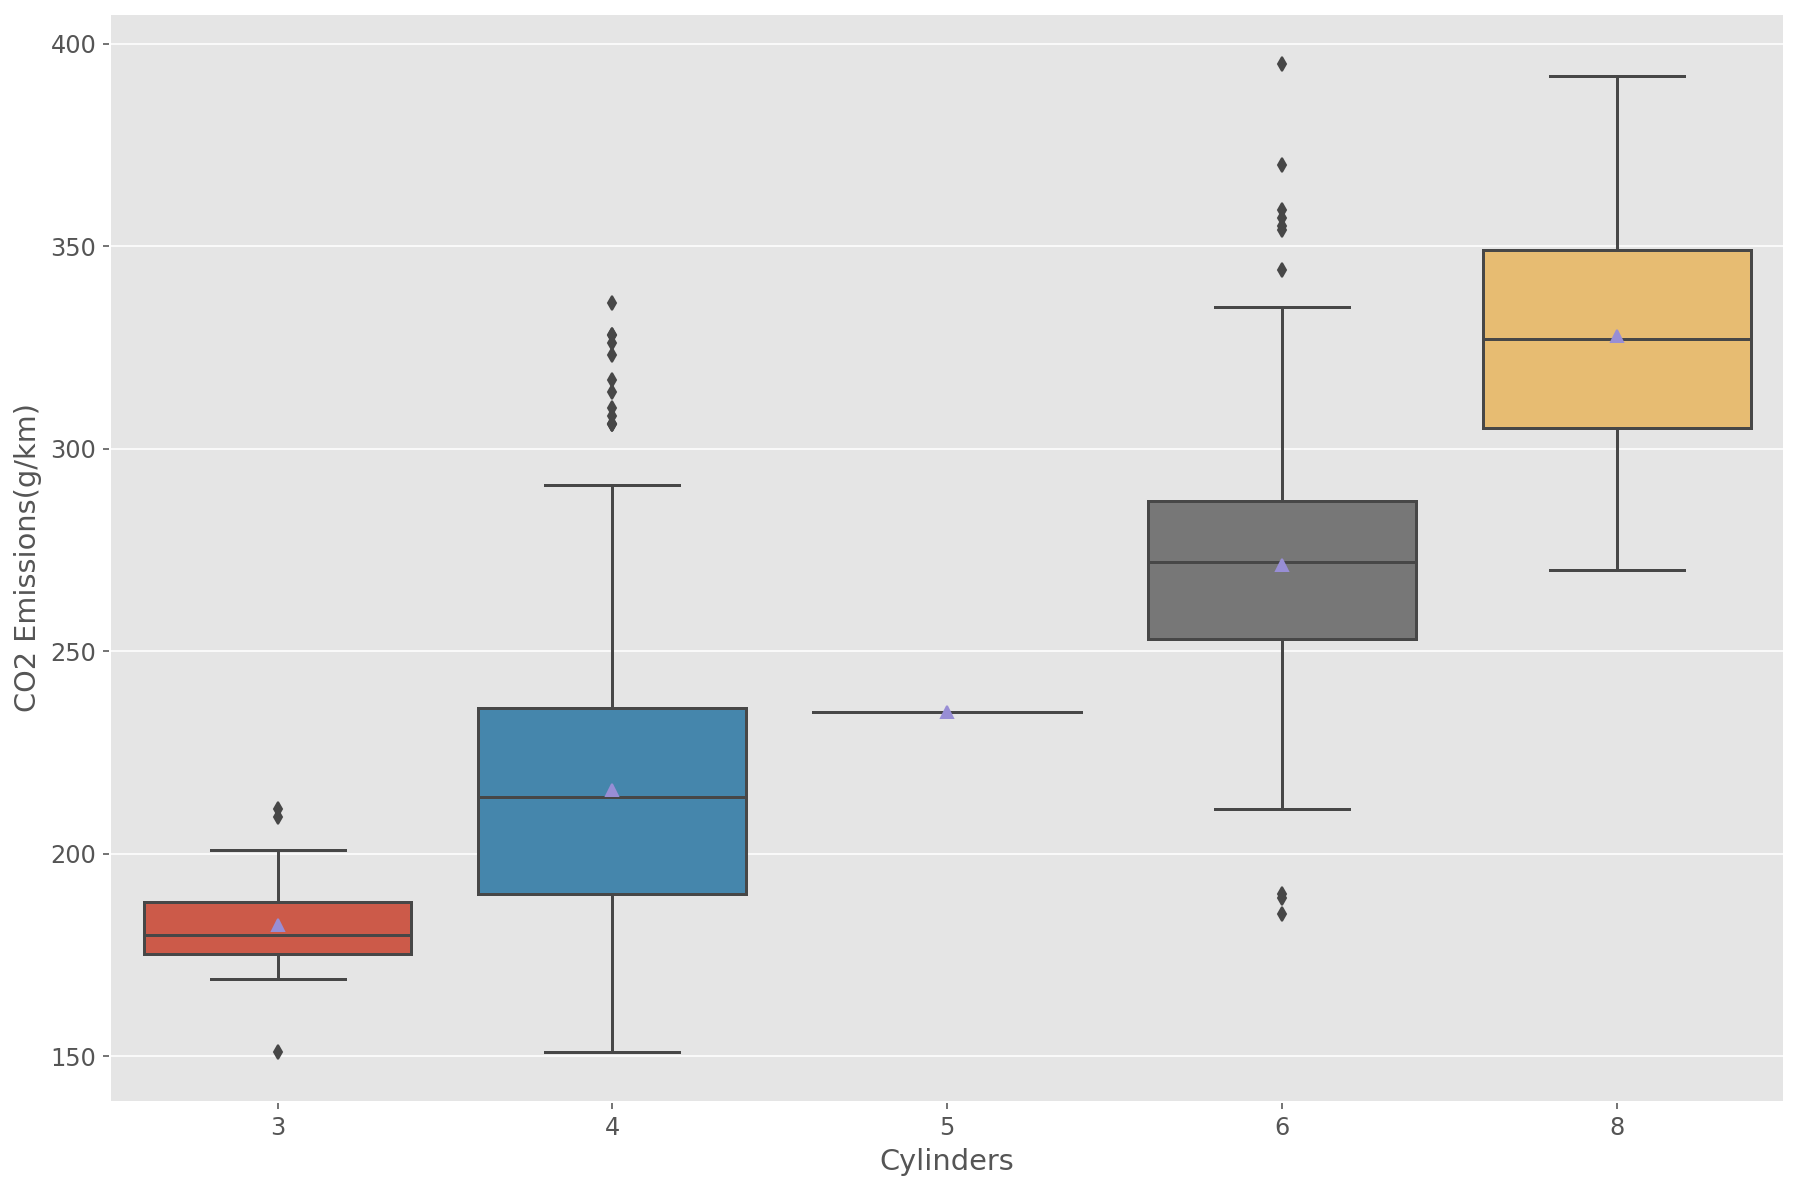

In [178]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df,showmeans=True)

In [179]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 3],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 4],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 5],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 6],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 8],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 10],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 12],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 16])

c:\Users\rafly\anaconda3\lib\site-packages\scipy\stats\stats.py:3680: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

*Fuel Type Vs CO2 Emissions*


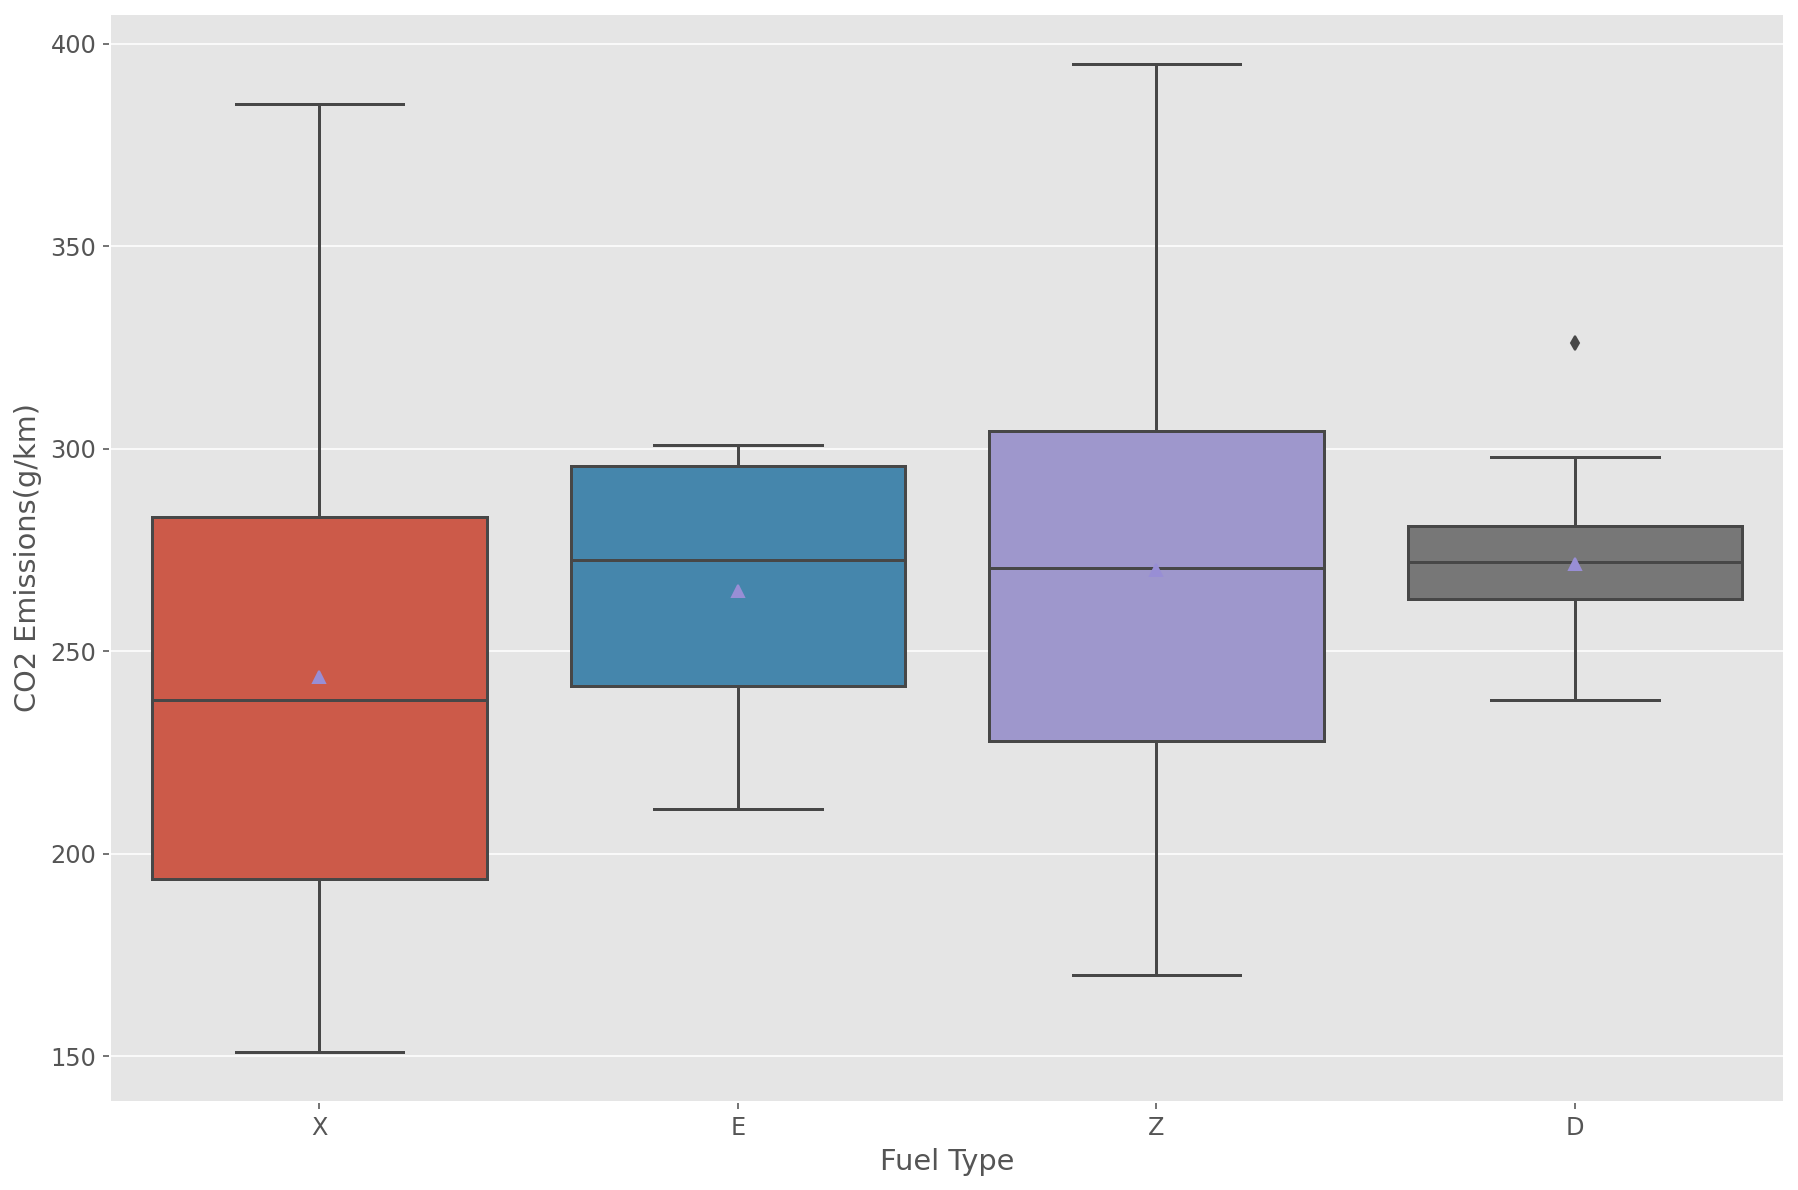

In [180]:
sorted = df[['Fuel Type', 'CO2 Emissions(g/km)']].groupby("Fuel Type").mean()
sorted = sorted.sort_values('CO2 Emissions(g/km)')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df,showmeans=True, order=sorted_index);

In [181]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'X'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'D'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'Z'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=32.3914858588482, pvalue=7.209341072906509e-20)

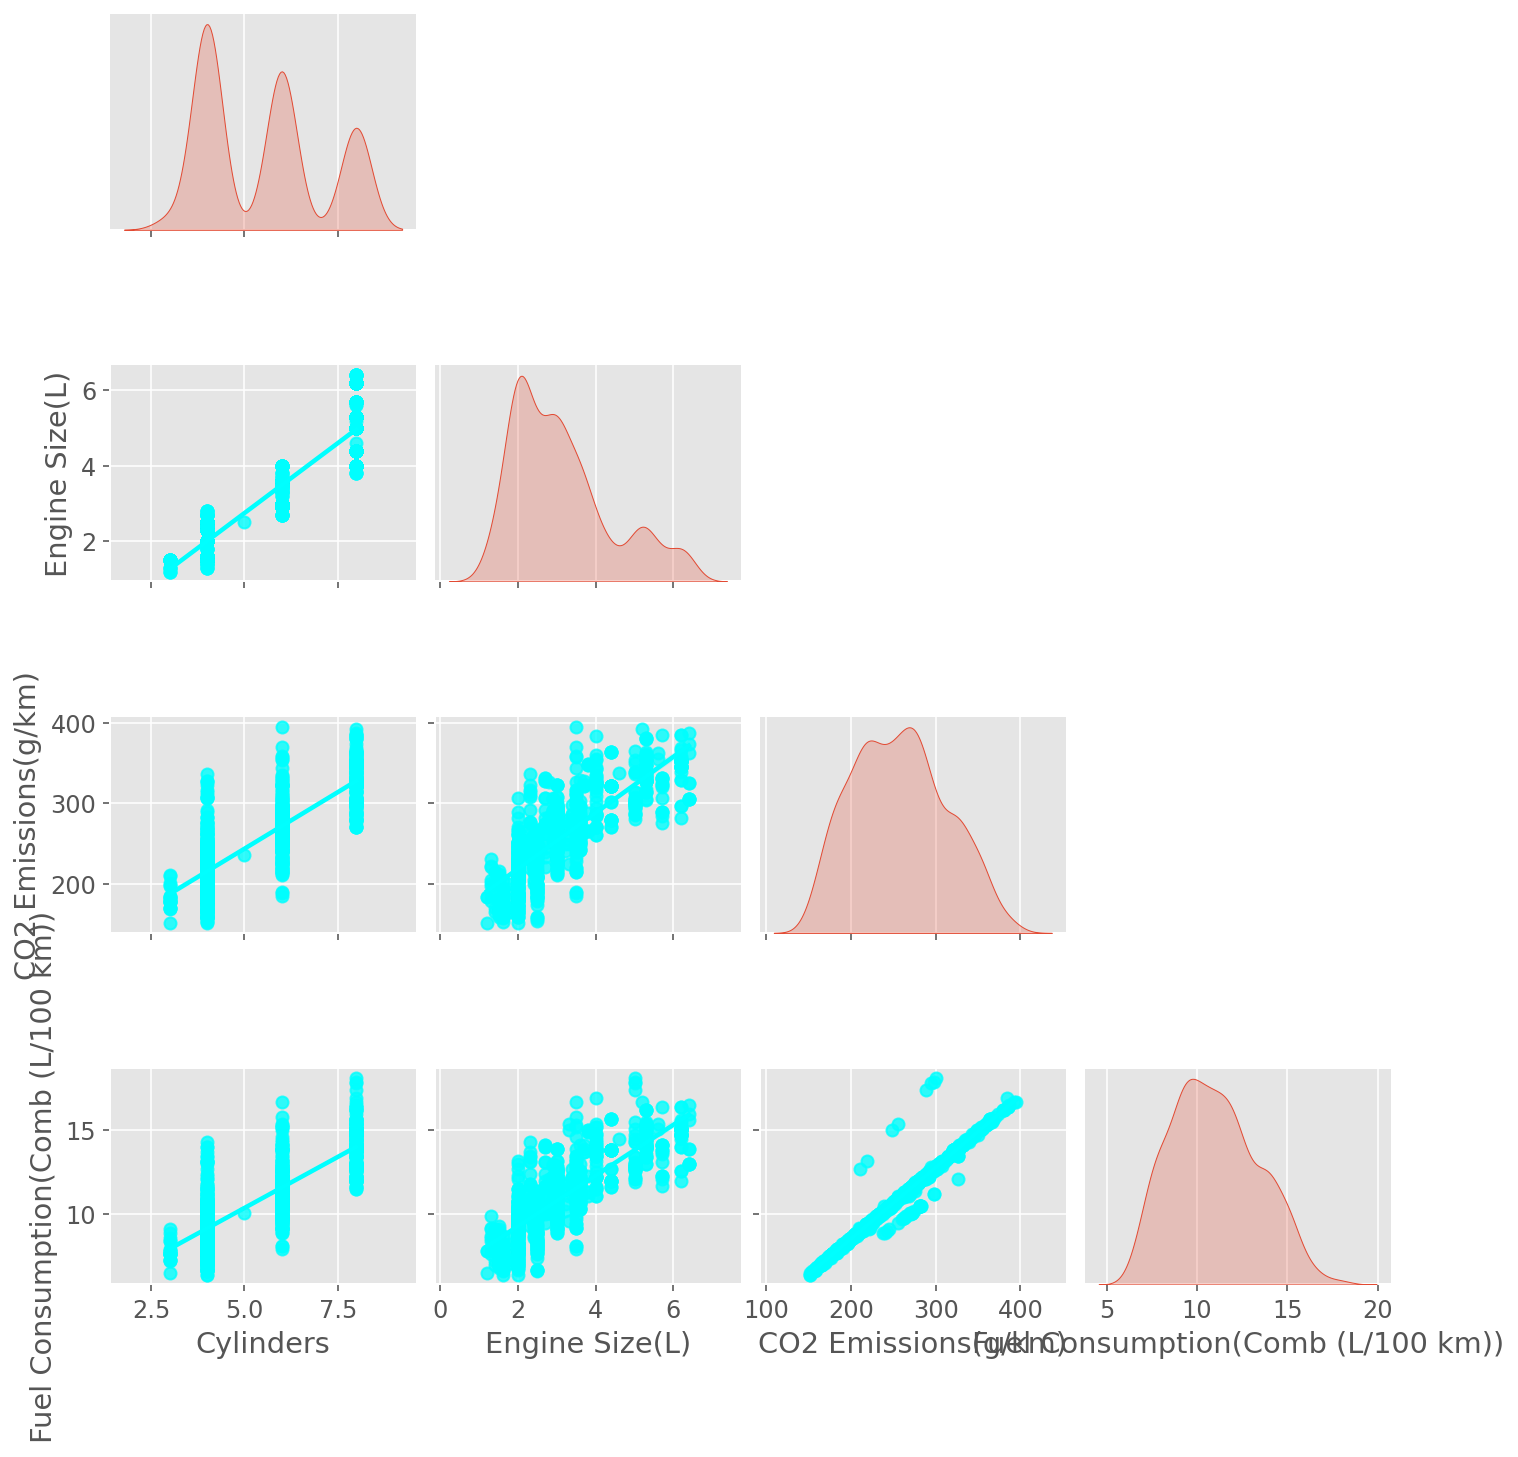

In [182]:
sns.pairplot(data = df, vars=['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))'], 
             kind ='reg', diag_kind="kde", plot_kws={'color':'#00ffff'},corner=True)

# Model Development: Simple Linear Regression
Simple Linear Regression is a method to understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y) The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$Y : Response Variable$$

$$X : Predictor Variables$$

**Linear function:**
$$Yhat=a+bX$$
 
a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

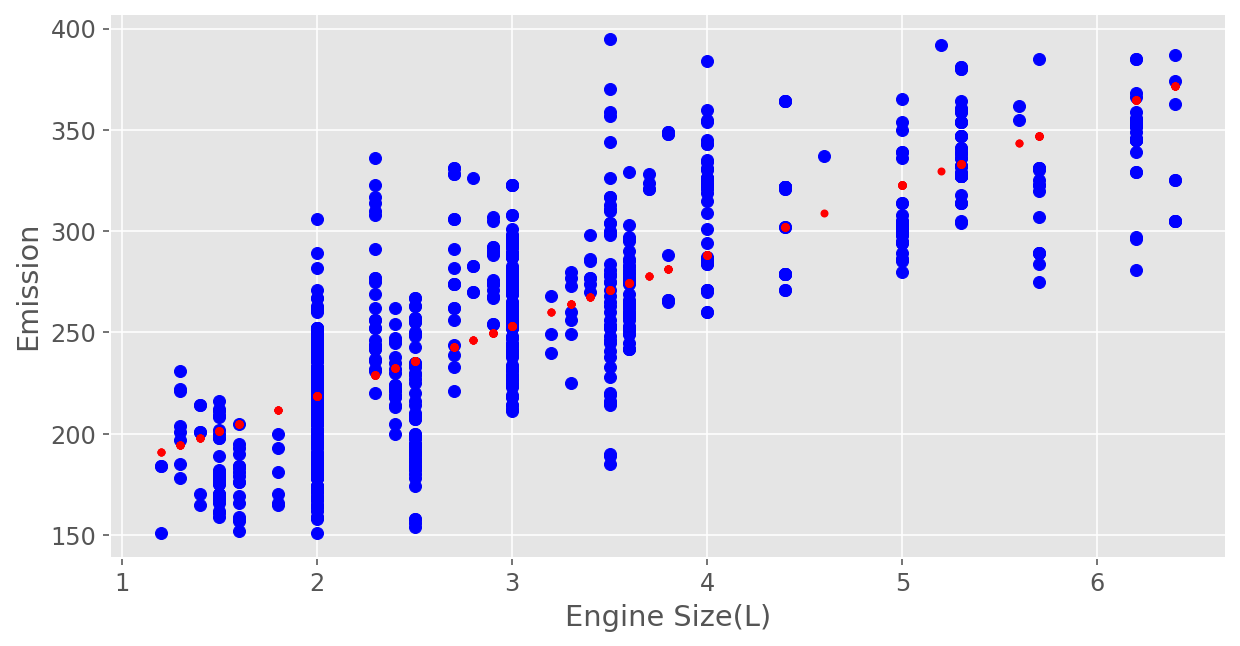

In [183]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
X = df[['Engine Size(L)']]
y = df['CO2 Emissions(g/km)']
lm.fit (X, y)
plt.scatter(X, y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '.r')
plt.xlabel("Engine Size(L)")
plt.ylabel("Emission")
plt.show()

In [184]:
#The value of the intercept (a)
print(lm.intercept_)
#The value of the Slope (b)
print(lm.coef_)

149.0690774521369
[34.76056035]


CO2 Emissions(g/km) = 135.60 + 38.63 x Engine Size(L)

In [185]:
lm.score(X, y) #accuracy of the model

0.6533595657890403

In [186]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [232.4944223  270.73103868 218.59019816 218.59019816]


In [190]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, Yhat))
print('Root Mean Squared Error (RMSE) of Simple Linear regression ', rmse)

The mean square error of price and predicted value is:  32.228558552055546


### Residual Plot

c:\Users\rafly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


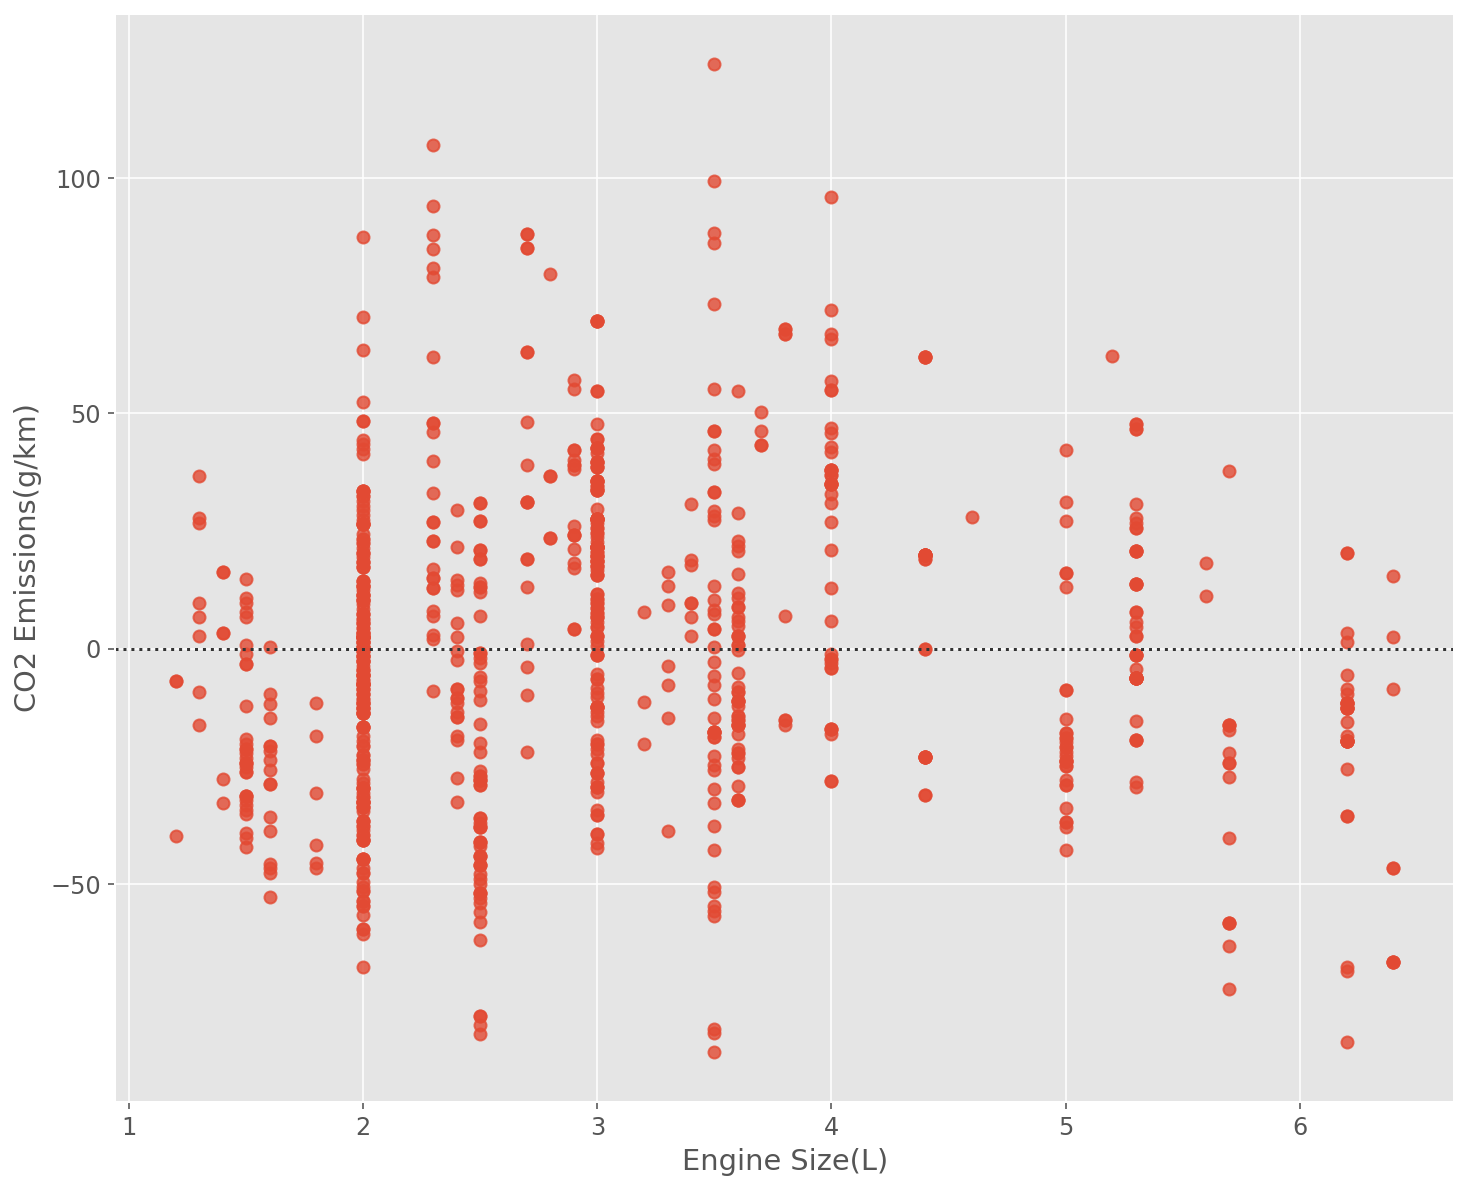

In [191]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(X, y)
plt.show()

# Multiple Linear Regression

In [199]:
a = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption(Comb (L/100 km))']]
lm.fit (a, y)

LinearRegression()

In [200]:
#The value of the intercept (a)
print(lm.intercept_)
#The value of the Slope (b)
print(lm.coef_)

14.185009074930292
[ 1.01336991  1.91556061 20.90811085]


In [201]:
lm.score(a, y) #accuracy of the model

0.9544410190180284

In [202]:
Y_predict_multifit = lm.predict(a)

In [204]:
print('Root Mean Squared Error (RMSE) of Simple Linear regression using multifit is: ', \
      np.sqrt(mean_squared_error(y, Y_predict_multifit)))

Root Mean Squared Error (RMSE) of Simple Linear regression using multifit is:  11.683911872448745


# Prediction and Decision Making

Berdasarkan hasil 2 model regression yang telah digunakan maka bisa kita ambil hasil atau nilai dari RMSE (Root Mean Square Error) dari kedua Model.
 Model Simple Linear Regression dimana X = Engine Size dan Y = Co2 Emission didapatkan hasil RMSE = 32.22

Model Multiple Linear Regression dimana X = Engine Size, Cylinders, Fuel Consumption dan Y = Co2 Emission didapatkan hasil RMSE = 11.68

Maka berdasarkan hasil RMSE bisa disimpulkan bahwa model **Multiple Linear Regression** yang **lebih Baik** 
